<a href="https://colab.research.google.com/github/RemasAlqahtani/Log_file_Analysis/blob/main/Log_file_analysis_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

,IP,Status,day,month,year,hour,minute,second,Methods,URL_new,Target
0,10.128.2.1,200,29,Nov,2017,06,58,55,GET,"[login.php , ]",True
1,10.128.2.1,302,29,Nov,2017,06,59,02,POST,"[process.php , ]",True
2,10.128.2.1,200,29,Nov,2017,06,59,03,GET,"[home.php , ]",True
3,10.131.2.1,200,29,Nov,2017,06,59,04,GET,[js],True
4,10.130.2.1,200,29,Nov,2017,06,59,06,GET,[bootstrap-3.3.7],True
...,...,...,...,...,...,...,...,...,...,...,...
16002,10.130.2.1,200,02,Mar,2018,15,47,12,GET,"[showcode.php?id=309&nm=ham05 , ]",True
16003,10.130.2.1,200,02,Mar,2018,15,47,23,GET,"[allsubmission.php , ]",True
16004,10.130.2.1,200,02,Mar,2018,15,47,32,GET,"[showcode.php?id=309&nm=ham05 , ]",True
16005,10.130.2.1,200,02,Mar,2018,15,47,35,GET,"[allsubmission.php , ]",True


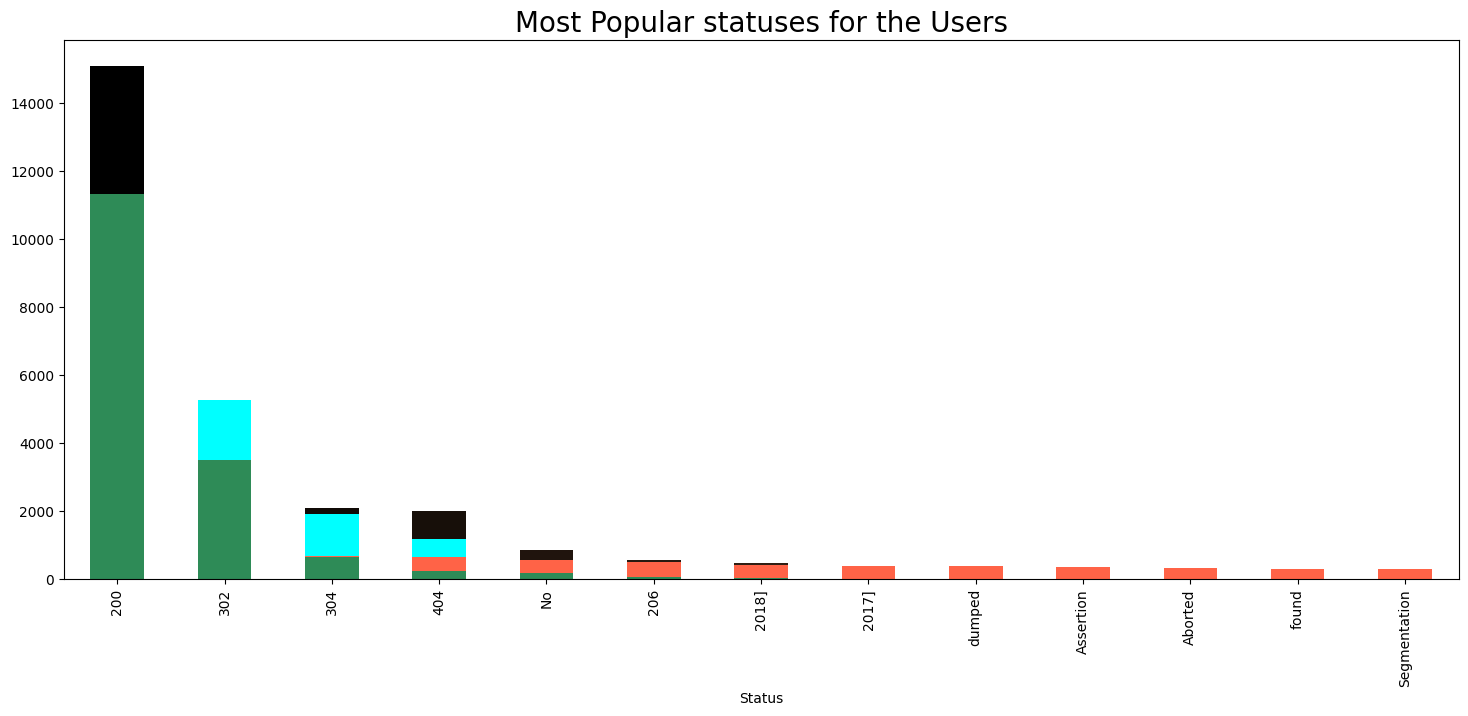

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns





# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
duplicate = pd.read_csv('/content/drive/MyDrive/weblog.csv')
duplicate
duplicate.dtypes
data=pd.DataFrame(duplicate)
data.dtypes





data['Time']=data['Time'].map(lambda x: x.lstrip('['))
data['Time'] = pd.to_datetime(data['Time'],format='%d%m%Y', errors='ignore')




data = data.rename(columns={'Staus': 'Status'}, index={'ONE': 'one'})
data['URL']=data['URL'].map(lambda x: x.lstrip('0'))
data.describe()



data.isnull().sum().sum()




data['cc'] = data['Time'].str.slice(0, 1)
data['day'] = data['Time'].str.slice(0, 2)
data['month'] = data['Time'].str.slice(3, 6)
data['year'] = data['Time'].str.slice(7, 11)
data['hour'] = data['Time'].str.slice(12, 14)
data['minute'] = data['Time'].str.slice(15, 17)
data['second'] = data['Time'].str.slice(18, 20)
data = data.drop(data.columns[1], axis=1)
data







data['Methods'] = data['URL'].str.split('/').str[0]
#if data['URL'].str.contains('.js').any():
#   data['URL_new'] = data['URL'].str.split('/').str[3]
if data['URL'].str.contains('.php').any():
    data['URL_new'] = data['URL'].str.split('/').str[1]
elif data['URL'].str.contains('.js').any():
    data['URL_new'] = data['URL'].str.split('/').str[3]






data['URL_new'] = data['URL_new'].str.split('HTTP')




data['Target'] = 'Target'
def condition(x):
    if x == '404':
        return 'False'
    else:
        return 'True'
data['Target'] = data['Status'].apply(condition)




plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
data['Methods'].value_counts().head(40).plot.bar(color = color)
plt.title('Most Popular Methods by the Users', fontsize = 20)




plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
data['URL_new'].value_counts().head(40).plot.bar(color = color)
plt.title('Most Popular URLs by the Users', fontsize = 20)



plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
data['month'].value_counts().head(40).plot.bar(color = 'cyan')
plt.title('Most Popular Months of Logins', fontsize = 20)



plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
data['day'].value_counts().head(40).plot.bar(color = 'tomato')
plt.title('Most Popular Days of Logins', fontsize = 20)



plt.rcParams['figure.figsize'] = (18, 7)

color = plt.cm.Wistia(np.linspace(0, 1, 40))
data['Status'].value_counts().head(40).plot.bar(color = 'seagreen')
plt.title('Most Popular statuses for the Users', fontsize = 20)

import plotly.express as px
fig = px.bar(data, x="day", y="month", color="month",
            hover_data=['day'], barmode = 'stack',title = "Months to dates")
fig.show()
data = data.drop(data.columns[1], axis=1)
data = data.drop(data.columns[2], axis=1)

data


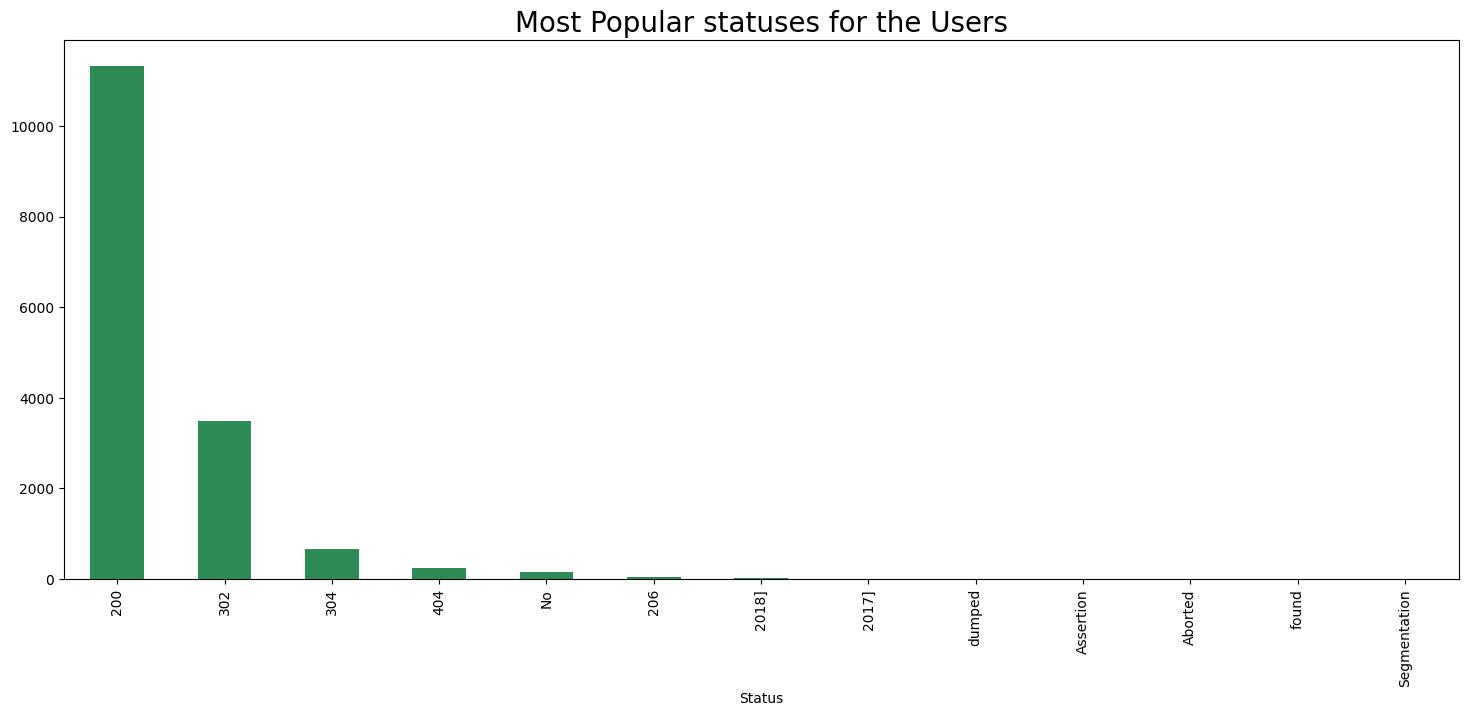

In [ ]:
plt.rcParams['figure.figsize'] = (18, 7)

color = plt.cm.Wistia(np.linspace(0, 1, 40))
data['Status'].value_counts().head(40).plot.bar(color = 'seagreen')
plt.title('Most Popular statuses for the Users', fontsize = 20)

plt.rcParams['figure.figsize'] = (18, 7)

Accuracy: 99.66%


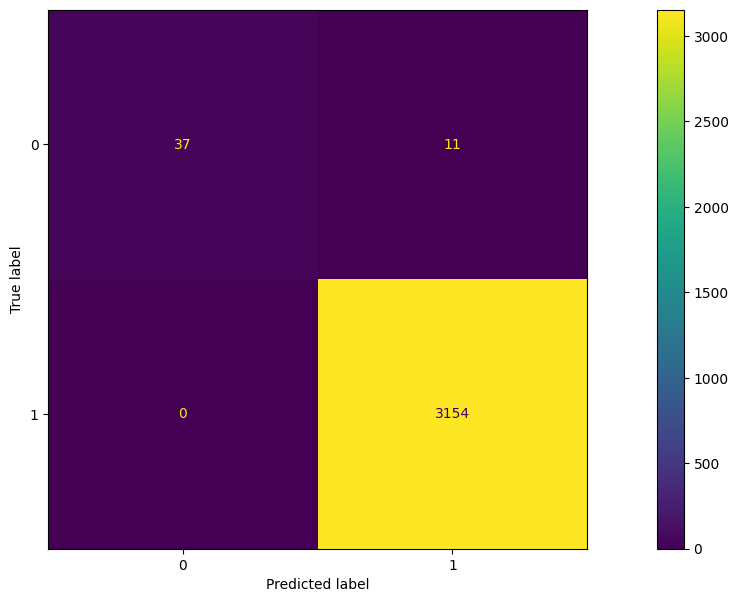

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



ValueError: X has 2 features, but SVC is expecting 10 features as input.

In [ ]:
df = data

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df = df.drop(index=1998)





for column in df.columns:
    if df[column].apply(lambda x: isinstance(x, list)).any():
        df[column] = df[column].apply(lambda x: str(x) if isinstance(x, list) else x)
    df[column] = df[column].astype(str)


label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le




X = df.iloc[:, :-1]
y = df.iloc[:, -1]
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


# Initialiser le modèle SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
cm = confusion_matrix(y_test, y_pred, labels=svm_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
disp.plot()

# Show the plot
plt.show()


h = .02  # step size in the mesh
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict for each point in the mesh
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Decision Boundary with PCA')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
